In [86]:
from lsg import *

from lsg.dimension import *
from lsg.imputation import impute_missing
from lsg.evaluation_tools.visualization import (
    projection_plot,
    distribution_plot,
    individual_travel_plot,
    correlation_plot,
    confidence_ellipse_plot,
)
from lsg.evaluation_tools.tool_functions import get_stats
from lsg.security_metrics import *
from lsg.signal_metrics import *


import pandas as pd
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# from lifelines.datasets import load_rossi
# from lifelines import CoxPHFitter

from math import exp


sns.set_theme(style="whitegrid")
import os

In [87]:
wbcd = pd.read_csv("../../datasets/WBCD/breast_cancer_wisconsin.csv", sep=",")
wbcd = wbcd.drop(columns="Sample_code_number")

# aids_avatarized = pd.read_csv("aids_avatarized.csv")
# aids = aids.drop(['pidnum'], axis=1)

In [88]:
wbcd.head()

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [89]:
wbcd.shape

(683, 10)

In [90]:
wbcd.Class = wbcd.Class.astype("category")
wbcd.dtypes

Clump_Thickness                   int64
Uniformity_of_Cell_Size           int64
Uniformity_of_Cell_Shape          int64
Marginal_Adhesion                 int64
Single_Epithelial_Cell_Size       int64
Bare_Nuclei                       int64
Bland_Chromatin                   int64
Normal_Nucleoli                   int64
Mitoses                           int64
Class                          category
dtype: object

Regarding variables types, a FAMD is performed for dimension reduction


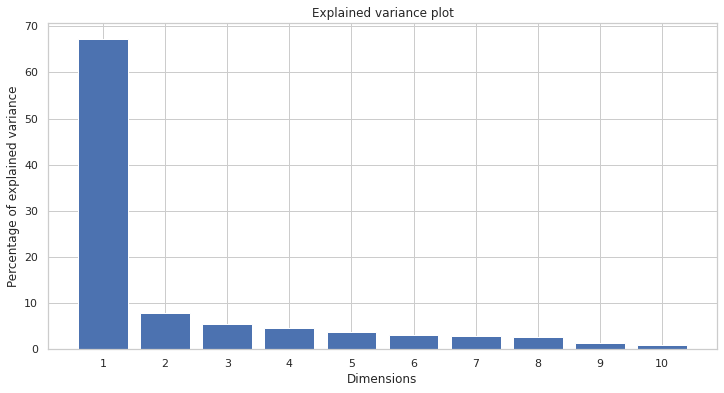

In [91]:
pr = Projection()
coord, mod = pr.fit_transform(wbcd)
pr.plot_explained_var()

<AxesSubplot:xlabel='Dim. 1', ylabel='Dim. 2'>

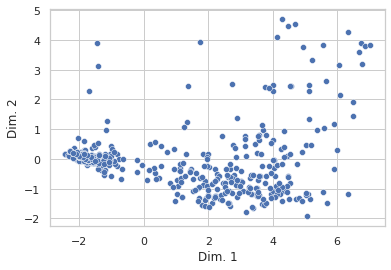

In [92]:
coord.head()
sns.scatterplot(data=coord, x="Dim. 1", y="Dim. 2")

In [93]:
pr

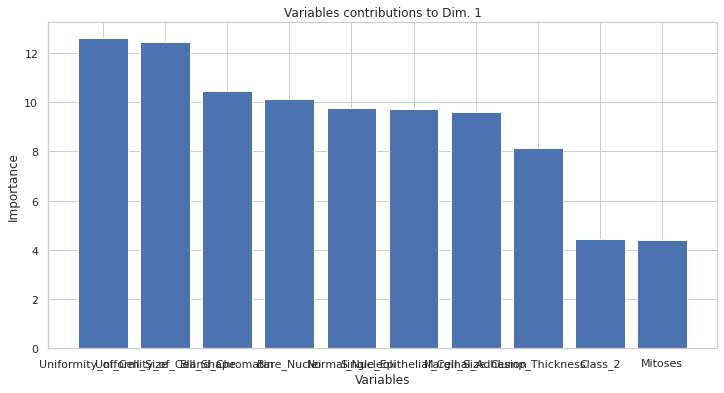

In [94]:
pr.plot_var_contribution(dim=1)

## Avatarization

In [116]:
wbcd = wbcd.astype("category")
wbcd_avatarize = avatarize(wbcd, k=20, ncp=2, drop_duplicates=False)

Regarding variables types, a MCA is performed for dimension reduction


In [117]:
wbcd_avatarize.head()

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,2,6,5,1,2,3,4,6,1,2
2,3,1,1,3,2,1,2,1,1,2
3,5,2,4,1,5,10,4,1,1,4
4,4,1,1,3,2,1,3,1,1,2


# Security metrics 

In [118]:
mt = Security_metrics()
mt.fit(wbcd, wbcd_avatarize, nf=2)
print("local_cloaking (avatars_median): ", mt.local_cloaking["avatars_median"])
print("hidden_rate : ", mt.hidden_rate)

Regarding variables types, a MCA is performed for dimension reduction
local_cloaking (avatars_median):  13.0
hidden_rate :  90.48316251830161


<AxesSubplot:ylabel='Count'>

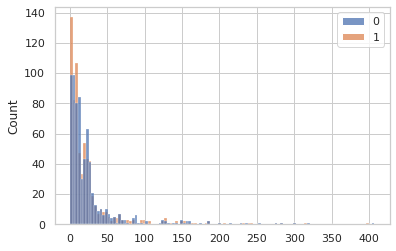

In [119]:
hit_counts = pd.DataFrame(mt.local_cloaking["hit_counts"])
sns.histplot(hit_counts)

In [120]:
wbcd.loc[
    wbcd.duplicated(keep=False),
].shape

(280, 10)

In [121]:
wbcd_avatarize.loc[
    wbcd_avatarize.duplicated(keep=False),
].shape

(329, 10)

## Signal protection

In [122]:
mts = Signal_metrics()
mts.fit(wbcd, wbcd_avatarize)
print("correlation_retention : ", mts.correlation_retention(1))

correlation_retention :  59.60320518766016


In [123]:
wbcd = wbcd.astype("category")
wbcd_avatarize = wbcd_avatarize.astype("category")

wbcd_avatarize.dtypes

Clump_Thickness                category
Uniformity_of_Cell_Size        category
Uniformity_of_Cell_Shape       category
Marginal_Adhesion              category
Single_Epithelial_Cell_Size    category
Bare_Nuclei                    category
Bland_Chromatin                category
Normal_Nucleoli                category
Mitoses                        category
Class                          category
dtype: object

In [124]:
np.unique(wbcd_avatarize["Uniformity_of_Cell_Shape"])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

<AxesSubplot:title={'center':'compative modality count of Uniformity_of_Cell_Size variable'}, xlabel='Uniformity_of_Cell_Size', ylabel='count'>

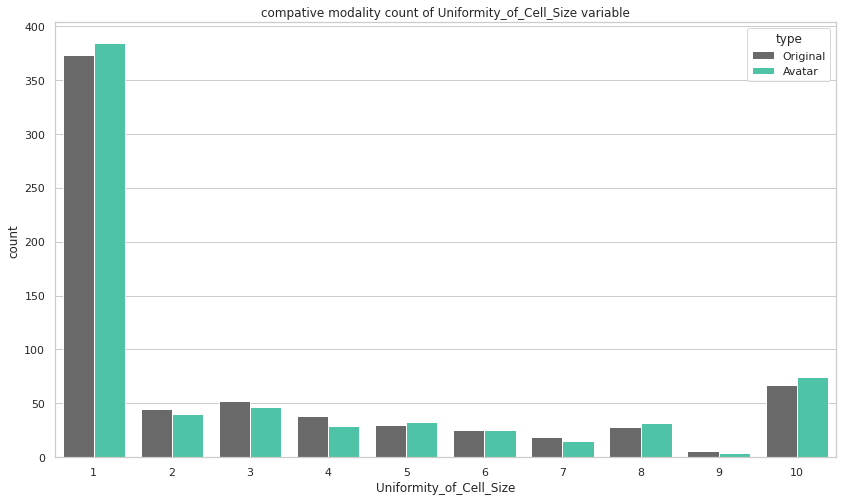

In [125]:
distribution_plot("Uniformity_of_Cell_Size", wbcd, wbcd_avatarize)

<AxesSubplot:title={'center':'compative modality count of Uniformity_of_Cell_Shape variable'}, xlabel='Uniformity_of_Cell_Shape', ylabel='count'>

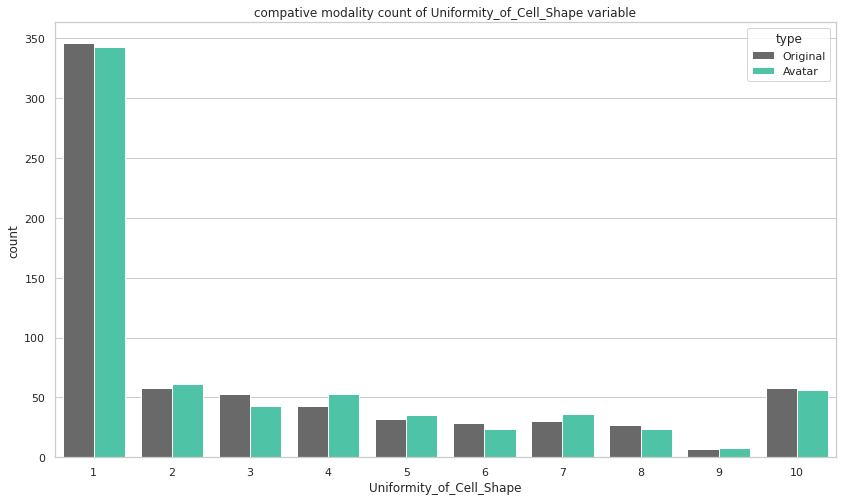

In [126]:
distribution_plot("Uniformity_of_Cell_Shape", wbcd, wbcd_avatarize)

<AxesSubplot:title={'center':'compative modality count of Marginal_Adhesion variable'}, xlabel='Marginal_Adhesion', ylabel='count'>

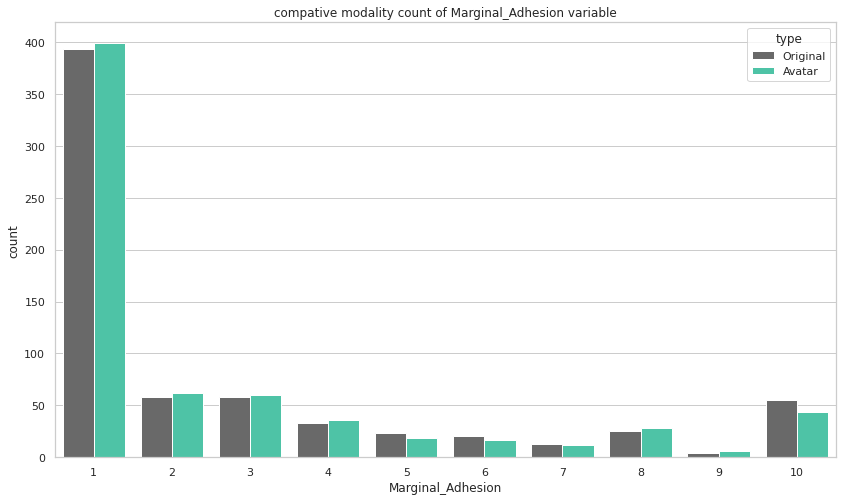

In [127]:
distribution_plot("Marginal_Adhesion", wbcd, wbcd_avatarize)

<AxesSubplot:title={'center':'compative modality count of Single_Epithelial_Cell_Size variable'}, xlabel='Single_Epithelial_Cell_Size', ylabel='count'>

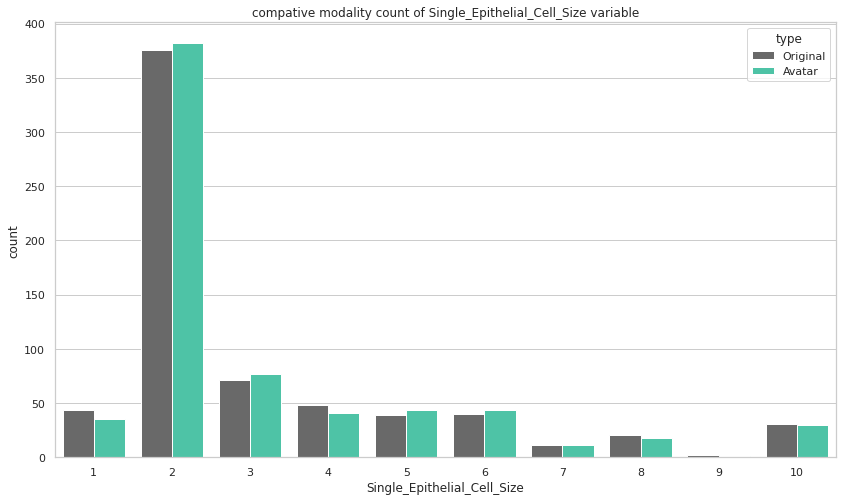

In [128]:
distribution_plot("Single_Epithelial_Cell_Size", wbcd, wbcd_avatarize)

<AxesSubplot:title={'center':'compative modality count of Bare_Nuclei variable'}, xlabel='Bare_Nuclei', ylabel='count'>

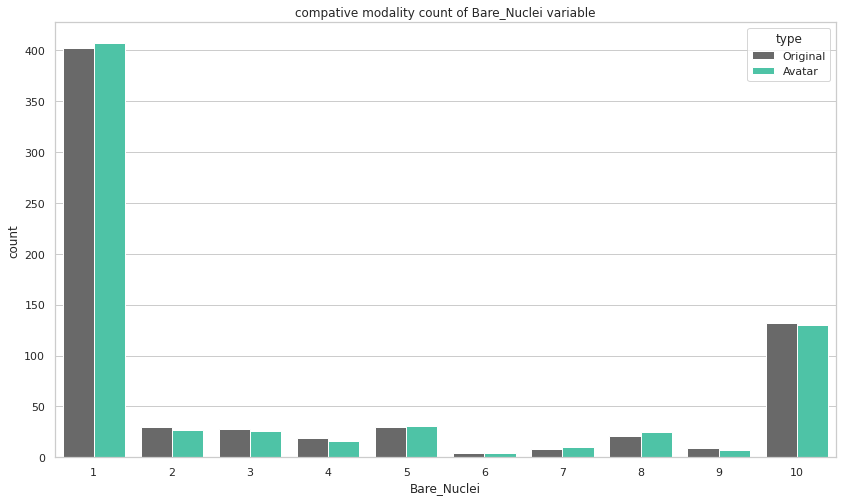

In [129]:
distribution_plot("Bare_Nuclei", wbcd, wbcd_avatarize)

<AxesSubplot:title={'center':'compative modality count of Bland_Chromatin variable'}, xlabel='Bland_Chromatin', ylabel='count'>

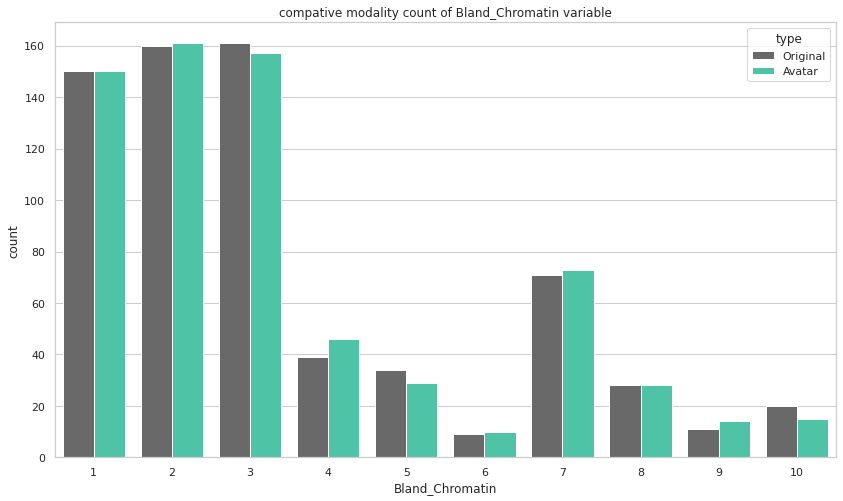

In [130]:
distribution_plot("Bland_Chromatin", wbcd, wbcd_avatarize)

<AxesSubplot:title={'center':'compative modality count of Normal_Nucleoli variable'}, xlabel='Normal_Nucleoli', ylabel='count'>

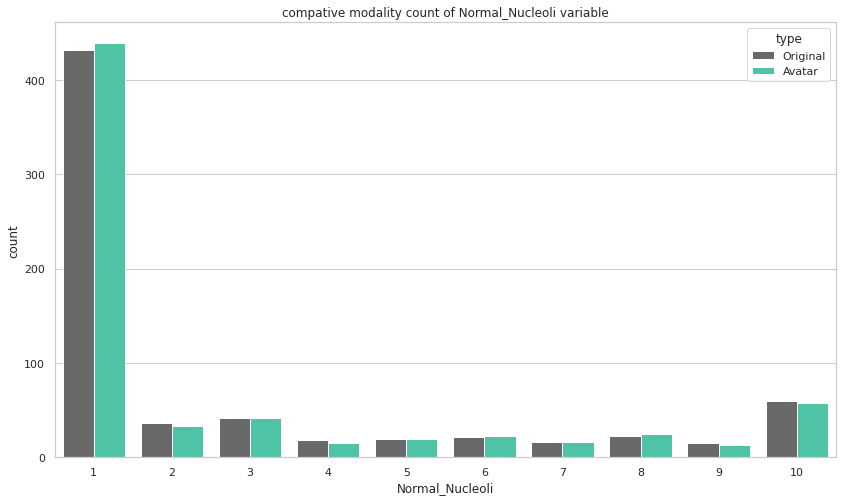

In [131]:
distribution_plot("Normal_Nucleoli", wbcd, wbcd_avatarize)

In [132]:
wbcd_avatarize["Mitoses"].dtypes

CategoricalDtype(categories=[1, 2, 3, 4, 5, 6, 7, 8, 10], ordered=False)

<AxesSubplot:title={'center':'compative modality count of Mitoses variable'}, xlabel='Mitoses', ylabel='count'>

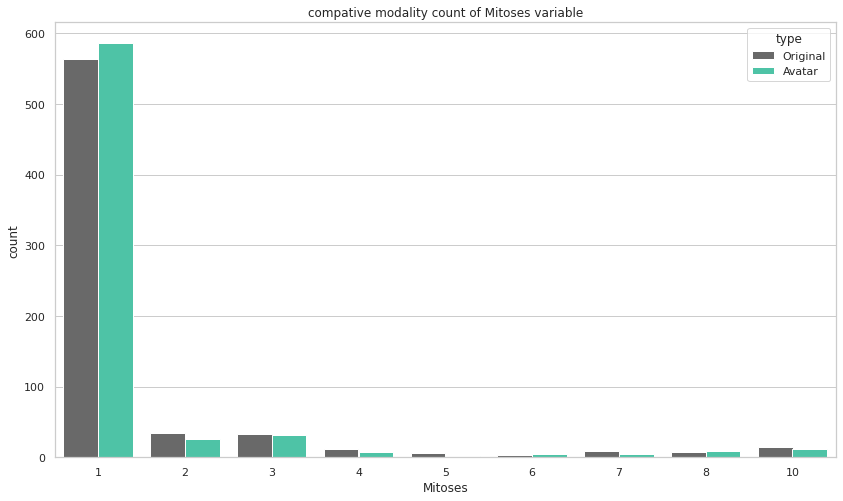

In [133]:
distribution_plot("Mitoses", wbcd, wbcd_avatarize)

<AxesSubplot:title={'center':'compative modality count of Class variable'}, xlabel='Class', ylabel='count'>

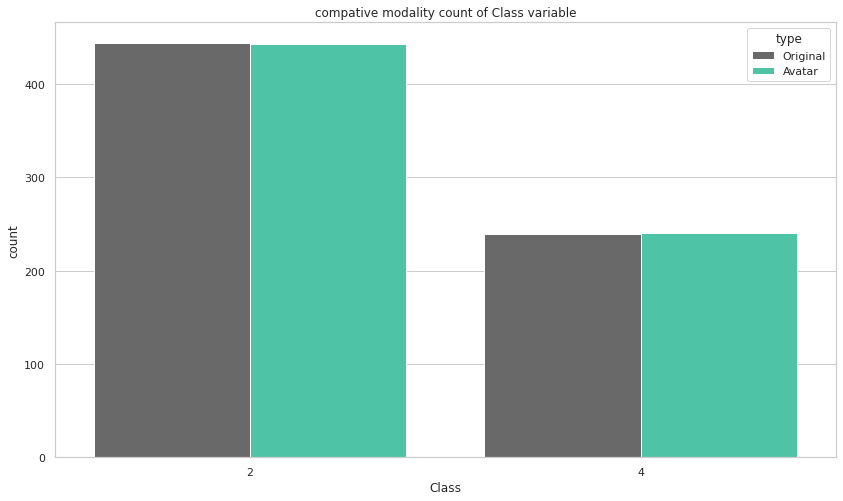

In [134]:
distribution_plot("Class", wbcd, wbcd_avatarize)

Regarding variables types, a MCA is performed for dimension reduction


<module 'matplotlib.pyplot' from '/home/user/anaconda3/envs/r_paper/lib/python3.8/site-packages/matplotlib/pyplot.py'>

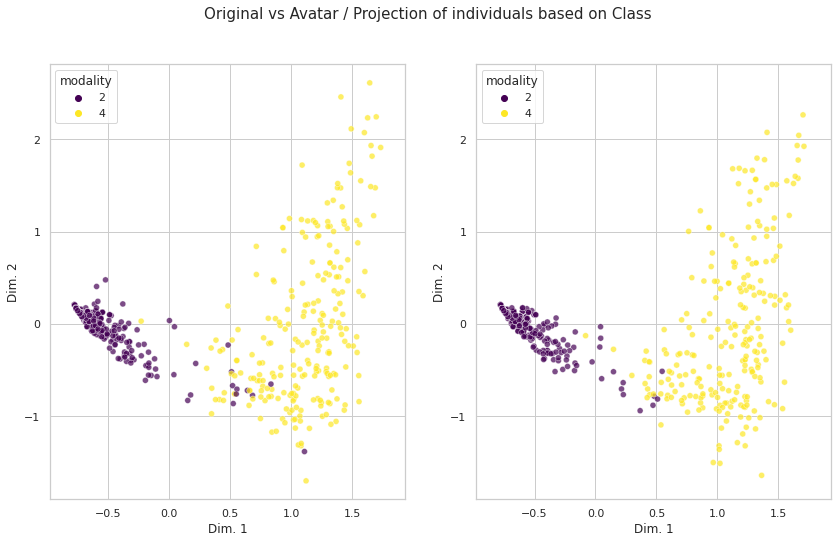

In [135]:
projection_plot(
    wbcd, wbcd_avatarize, graph_3D=False, variable_visualization="Class"
)  # common space

In [136]:
wbcd_avatarize.to_csv(
    "../../datasets/WBCD/breast_cancer_wisconsin_avatarized_k20.csv", index=False
)